# Spot Checking ML Models/Algorithms - Context - Classification Problem

Spot-checking is a way of discovering which algorithms perform well on your machine learning
problem. 
We cannot know which algorithms are best suited to your problem beforehand. 

We must trial a number of methods and focus attention on those that prove themselves the most
promising. 

In this notebook, we will discover five machine learning algorithms that can be used
when spot-checking a classification problem in Python with scikit-learn.



## Load Dependencies



In [0]:
# Hello World Classification: Iris flowers prediction

# Prepare Problem

# Load libraries

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, KFold 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


## Data Visualization

In [0]:
# Load dataset

dataset = datasets.load_iris()
#print(dataset)

data=dataset.data
targets= dataset.target



In [0]:
# Summarize Data

# Descriptive statistics
#---------------------------
# shape
print(data.shape)
# head
print(data[1:10,:])



(150, 4)
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


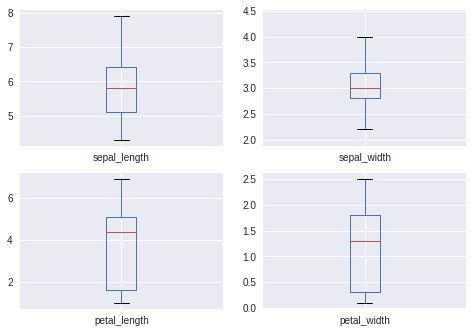

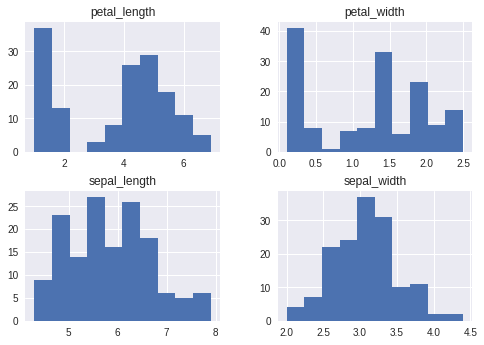

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


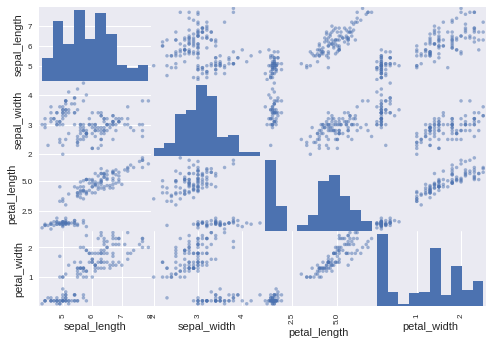

In [0]:
df=pd.DataFrame(data)
df.columns=['sepal_length', 'sepal_width', 'petal_length' ,'petal_width']
print(df.head())

# Data visualizations
#----------------------------
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# histograms
df.hist()
plt.show()

# scatter plot matrix
scatter_matrix(df)
plt.show()



### Splitting Data into Train/Test Sets

In [0]:
# Prepare Data
#--------------------------------
# Split-out validation dataset

X = data[:,0:4]
Y = targets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [0]:
# Test options and evaluation metric

## 10-fold cross-validation
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'


## Creating a List of ML Models/Estimators to Spot Check

In [0]:
# Spot Check Algorithms
#----------------------------
models = []
models.append(('LR', LogisticRegression())) # Logistic regression is a classification algorithm
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



### Evaluate each model in turn and Cross-Validate Results

In [0]:
# Evaluate each model in turn
#-------------------------------
results = []
names = []
for name, model in models:
    # Cross-validation
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

    results.append(cv_results)
	names.append(name)
	msg = "\n %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



 LR: 0.958333 (0.055902)

 KNN: 0.983333 (0.033333)

 CART: 0.950000 (0.076376)

 NB: 0.966667 (0.040825)

 SVM: 0.991667 (0.025000)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

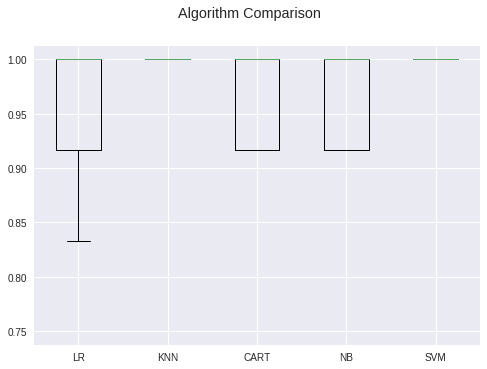

In [0]:
# Compare Algorithms
#-------------------------
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## SVM is the best classifier as shown in the above results

### We, finally, select SVM as our machine learning model and work with it further.
### Next, we can think about hyper parameter tuning of this model etc and try to further improve its performance.

In [0]:
# Make predictions on validation dataset
#-------------------------------------------------
svm = SVC()
svm.fit(X_train, Y_train)

print('\n Performance Evaluation of the Best Model on the validation/test Set : \n')
predictions = svm.predict(X_validation)

print('\n Accuracy: ')
print(accuracy_score(Y_validation, predictions))

print('\n Confusion Matrix : ')
print(confusion_matrix(Y_validation, predictions))

print('\n Classification Report : ')
print(classification_report(Y_validation, predictions))



 Performance Evaluation of the Best Model on the validation/test Set : 


 Accuracy: 
0.9333333333333333

 Confusion Matrix : 
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]

 Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
